In [1]:
##############################################################
##         Part I: Data Analysis & Preprocessing
##############################################################

In [ ]:
# Task 1.1

In [485]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Task 1.2

In [486]:
df = pd.read_csv(r"G:\University of Buffalo\CSE 574\Assignments\Assignment 1\noisy_datasets\penguins.csv")

In [487]:
'''
All the preprocessing are done on part 1.3, 1.4, 1.5, 1.7, 1.8, 1.9
'''
df.describe(include='all')

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
count,333,334,344.000000,344.000000,337.000000,333.000000,336.000000,339.000000,327,342.000000
unique,8,8,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN,male,NaN
freq,145,160,NaN,NaN,NaN,NaN,NaN,NaN,164,NaN
mean,NaN,NaN,5270.002907,10.447674,45.494214,18.018318,197.764881,4175.463127,NaN,2008.035088
std,NaN,NaN,1067.959116,2.265895,10.815787,9.241384,27.764491,858.713267,NaN,0.816938
min,NaN,NaN,3504.000000,7.000000,32.100000,13.100000,10.000000,882.000000,NaN,2007.000000
25%,NaN,NaN,4403.000000,9.000000,39.500000,15.700000,190.000000,3550.000000,NaN,2007.000000
50%,NaN,NaN,5106.500000,10.000000,45.100000,17.300000,197.000000,4050.000000,NaN,2008.000000
75%,NaN,NaN,6212.750000,12.000000,49.000000,18.700000,213.000000,4750.000000,NaN,2009.000000


In [412]:
# 1.3

In [488]:
df.shape
df.dropna(subset=['gender', 'species', 'island'], inplace=True)
df.shape

(311, 10)

In [ ]:
# 1.4

In [489]:
counts = df['island'].value_counts()
counts

Biscoe       152
Dream        111
Torgersen     42
biscoe         2
dream          2
DREAM          1
BISCOE         1
Name: island, dtype: int64

In [490]:
df['species'] = df['species'].replace('GENTOO','Gentoo')
df['species'] = df['species'].replace('gentoo','Gentoo')
df['species'] = df['species'].replace('chinstrap','Chinstrap')
df['species'] = df['species'].replace('CHINSTRAP','Chinstrap')
df['species'] = df['species'].replace('adelie','Adelie')

df['island'] = df['island'].replace('biscoe','Biscoe')
df['island'] = df['island'].replace('BISCOE','Biscoe')
df['island'] = df['island'].replace('dream','Dream')
df['island'] = df['island'].replace('DREAM','Dream')
df['island'] = df['island'].replace('torgersen','Torgersen')

df['gender'] = df['gender'].replace('MALE','male')

In [ ]:
# 1.5

In [491]:
mean = df.loc[df['flipper_length_mm']>100, 'flipper_length_mm'].mean()
df["flipper_length_mm"] = df["flipper_length_mm"].mask(df["flipper_length_mm"] < 100, mean)

In [362]:
# 1.6

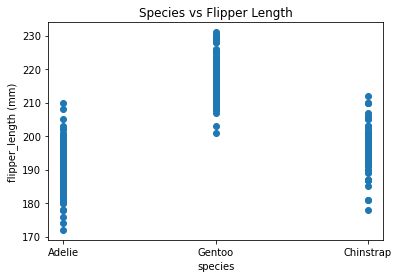

In [376]:
plt.xlabel('species')
plt.ylabel('flipper_length (mm)')
plt.title("Species vs Flipper Length")
plt.scatter(df['species'], df['flipper_length_mm'])

Text(0.5, 1.0, 'Gender vs Body Mass')

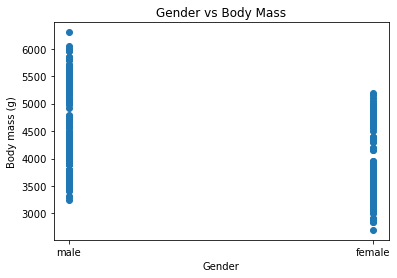

In [377]:
plt.xlabel('gender')
plt.ylabel('body mass (g)')

plt.scatter( df['gender'], df['body_mass_g'])
plt.xlabel("Gender")
plt.ylabel("Body mass (g)")
plt.title("Gender vs Body Mass")

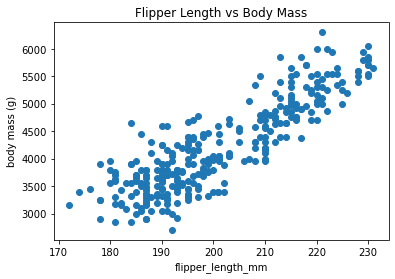

In [378]:
plt.xlabel('flipper_length_mm')
plt.ylabel('body mass (g)')
plt.title("Flipper Length vs Body Mass")

plt.scatter(df['flipper_length_mm'], df['body_mass_g'])

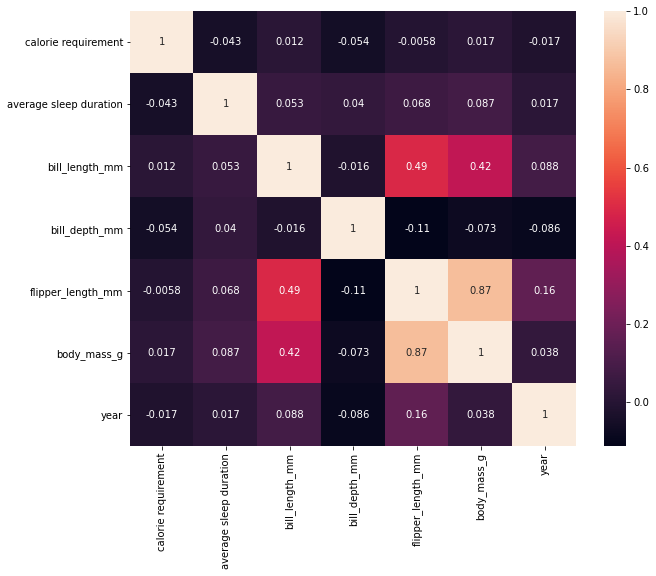

In [434]:
import seaborn as sns
 
# checking correlation using heatmap
# plotting the heatmap for correlation
plt.figure(figsize=(10, 8))
ax = sns.heatmap(df.corr(), annot=True)

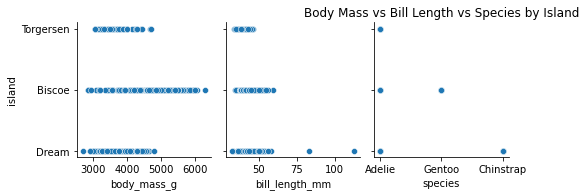

In [389]:
import seaborn as sns

# Create a pair plot
sns.pairplot(df, x_vars=['body_mass_g', 'bill_length_mm', 'species'], y_vars='island', kind='scatter')
plt.title("Body Mass vs Bill Length vs Species by Island")
plt.show()

In [ ]:
# 1.7

In [479]:
df.corr()
df = df.drop(['calorie requirement', 'average sleep duration', 'year'], axis=1)
df.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
bill_length_mm,1.000000,-0.016331,0.494668,0.416133
bill_depth_mm,-0.016331,1.000000,-0.111528,-0.073417
flipper_length_mm,0.494668,-0.111528,1.000000,0.868017
body_mass_g,0.416133,-0.073417,0.868017,1.000000


In [392]:
# 1.8

In [493]:
# df['species'] = pd.factorize(df['species'])[0]
# df['island'] = pd.factorize(df['island'])[0]
df['gender'] = pd.factorize(df['gender'])[0]

df = pd.get_dummies(df, columns = ['species', 'island']) 
print(df)

print(df)

     calorie requirement  average sleep duration  bill_length_mm  \
0                   6563                      11        0.086795   
1                   4890                      14        0.091754   
2                   7184                      11        0.101674   
4                   4774                       8        0.057037   
5                   4403                      13        0.089275   
..                   ...                     ...             ...   
339                 4826                      11        0.293862   
340                 4111                       9        0.141352   
341                 7049                      10        0.216987   
342                 4705                       7        0.231866   
343                 6098                       7        0.224427   

     bill_depth_mm  flipper_length_mm  body_mass_g  gender    year  \
0         0.049054           0.152542     0.291667       0  2007.0   
1         0.037666           0.237288     0

In [ ]:
# 1.9

In [492]:
def normalize(column_name):
    minimum = df[column_name].min()
    maximum = df[column_name].max()

    normalized_column = (df[column_name] - minimum) / (maximum - minimum)

    return normalized_column
    
df['bill_length_mm'] = normalize('bill_length_mm')
df['flipper_length_mm'] = normalize('flipper_length_mm')
df['body_mass_g'] = normalize('body_mass_g')
df['bill_depth_mm'] = normalize('bill_depth_mm')

df



,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
0,Adelie,Torgersen,6563,11,0.086795,0.049054,0.152542,0.291667,male,2007.0
1,Adelie,Torgersen,4890,14,0.091754,0.037666,0.237288,0.305556,female,2007.0
2,Adelie,Torgersen,7184,11,0.101674,0.042922,0.389831,0.152778,female,2007.0
4,Adelie,Torgersen,4774,8,0.057037,0.054310,0.355932,0.208333,female,2007.0
5,Adelie,Torgersen,4403,13,0.089275,0.065697,0.305085,0.263889,male,2007.0
...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,4826,11,0.293862,0.058690,0.593220,0.361111,male,2009.0
340,Chinstrap,Dream,4111,9,0.141352,0.043798,0.508475,0.194444,female,2009.0
341,Chinstrap,Dream,7049,10,0.216987,0.044674,0.355932,0.298611,male,2009.0
342,Chinstrap,Dream,4705,7,0.231866,0.051682,0.644068,0.388889,male,2009.0


In [15]:
##############################################################
##         Part I: Ques 10
##############################################################

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df2 = pd.read_csv(r"G:\University of Buffalo\CSE 574\Assignments\Assignment 1\noisy_datasets\emissions_by_country.csv")
df2

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,Afghanistan,AFG,1750.0,0.00000,70,55455,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,1751.0,0.00000,66,45101,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,1752.0,0.00000,72,31891,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,1753.0,0.00000,44,35466,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,1754.0,0.00000,21,33247,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63099,Global,WLD,2017.0,36096.73928,22,32659,14506.97381,12242.62794,7144.928128,1507.923185,391.992176,302.294047,4.749682
63100,Global,WLD,2018.0,36826.50660,44,21696,14746.83069,12266.01629,7529.846784,1569.218392,412.115746,302.478706,4.792753
63101,Global,WLD,2019.0,37082.55897,78,52918,14725.97803,12345.65337,7647.528220,1617.506786,439.253991,306.638573,4.775633
63102,Global,WLD,2020.0,35264.08573,34,39808,14174.56401,11191.80855,7556.290283,1637.537532,407.583673,296.301685,4.497423


In [419]:
#Filtering the years
for x in df2.index:
    if df2.loc[x, "Year"] < 1991 or df2.loc[x, "Year"] > 2020:
        df2.drop(x, inplace=True)

In [18]:
df2.describe(include='all')

,Country,ISO 3166-1 alpha-3,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
count,7099,6897,6726.000000,7405.000000,7523.000000,7523.000000,6570.000000,6538.000000,6525.000000,6282.000000,6494.000000,1564.000000,6874.000000
unique,398,371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,India,KNA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,35,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2005.460898,271.062018,49.317294,39076.417254,141.973034,161.307572,113.573431,48.637390,44.748764,310.679658,72.040203
std,NaN,NaN,8.665817,2010.547540,17.229628,10924.174038,926.614383,819.506788,526.947931,295.985663,298.696390,758.245337,376.823930
min,NaN,NaN,1991.000000,0.000000,20.000000,20007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1998.000000,0.389947,34.000000,29657.500000,0.000000,0.713086,0.000000,0.000000,0.000000,0.563982,0.548077
50%,NaN,NaN,2005.000000,4.565975,49.000000,39117.000000,0.058625,4.058476,0.036640,0.321465,0.000000,1.766967,2.687268
75%,NaN,NaN,2013.000000,48.912715,64.000000,48490.500000,8.049719,29.819408,13.563300,1.865889,0.272566,8.608762,7.222893


In [19]:
df2 = df2.drop_duplicates()
f2 = df2.drop(columns=['ISO 3166-1 alpha-3'], inplace=True)

In [421]:
#df2['Country'] = df2['Country'].replace('slovakia','Slovakia', inplace=True)

counts = df2['Country'].value_counts()
counts

BELARUS       30
FRANCE        30
GLOBAL        30
HUNGARY       30
ITALY         30
AUSTRALIA     29
BELGIUM       29
GREECE        29
KAZAKHSTAN    29
USA           29
ICELAND       28
JAPAN         28
Name: Country, dtype: int64

In [420]:
# Filling the missing years (As it's numerical and in sequence)
#df2['Year'].interpolate(inplace=True)

# Filling the missing country names with the previous value
df2['Country'] = df2['Country'].fillna(method='ffill')

for x in df2['Country']:
    y = x.upper()
    df2['Country'].replace(x, y, inplace=True)

df2.reset_index(drop=True, inplace=True)

In [422]:
#Filtering the countries
for x in df2.index:
    if df2.loc[x, "Country"] == 'AUSTRALIA' or df2.loc[x, "Country"] == 'BELARUS' or df2.loc[x, "Country"] == 'BELGIUM' or df2.loc[x, "Country"] == 'FRANCE' or df2.loc[x, "Country"] == 'GREECE' or df2.loc[x, "Country"] == 'HUNGARY' or df2.loc[x, "Country"] == 'ICELAND' or df2.loc[x, "Country"] == 'ITALY' or df2.loc[x, "Country"] == 'JAPAN' or df2.loc[x, "Country"] == 'KAZAKHSTAN' or df2.loc[x, "Country"] == 'USA' or df2.loc[x, "Country"] == 'GLOBAL':
        pass
    else:
        df2.drop(x, inplace=True)

        
df2        

,Country,Year,Total,Temperature,Coal,Oil,Gas,Cement
0,AUSTRALIA,1991.0,0.007482,0.966102,0.009690,0.007009,0.004287,0.001305
1,AUSTRALIA,1992.0,0.007617,0.915254,0.009953,0.006982,0.004442,0.001199
2,AUSTRALIA,1993.0,0.007734,0.016949,0.009956,0.007182,0.004664,0.001232
3,AUSTRALIA,1994.0,0.007864,0.508475,0.010041,0.007307,0.004842,0.001429
4,AUSTRALIA,1995.0,0.008169,0.694915,0.010330,0.007647,0.005208,0.001377
...,...,...,...,...,...,...,...,...
346,GLOBAL,2016.0,0.957973,0.593220,0.954096,0.973929,0.911883,0.609929
347,GLOBAL,2017.0,0.973414,0.033898,0.963821,0.991654,0.934279,0.618255
348,GLOBAL,2018.0,0.993095,0.406780,0.979757,0.993548,0.984612,0.643386
349,GLOBAL,2019.0,1.000000,0.983051,0.978372,1.000000,1.000000,0.663184


In [23]:
df2.reset_index(drop=True, inplace=True)

In [24]:
#Bad way to split the dataset

# for x in df2.index:
#     if df2.loc[x, "Country"] == 'AUSTRALIA':
#         print(df2.iloc[x].values)

#Good way to split the dataset

grouped = df2.groupby('Country')

df2_aus = grouped.get_group('AUSTRALIA')
df2_belgium = grouped.get_group('BELGIUM')
df2_belarus = grouped.get_group('BELARUS')
df2_hun = grouped.get_group('HUNGARY')
df2_ita = grouped.get_group('ITALY')
df2_kaz = grouped.get_group('KAZAKHSTAN')
df2_jap = grouped.get_group('JAPAN')
df2_gre = grouped.get_group('GREECE')
df2_fra = grouped.get_group('FRANCE')
df2_ice = grouped.get_group('ICELAND')
df2_usa = grouped.get_group('USA')
df2_glo = grouped.get_group('GLOBAL')

#Data Cleaning by Country

#Australia
df2_aus = df2_aus[3:]
df2_aus

#Belgium
df2_belgium = df2_belgium[3:]
df2_belgium

#Belarus
df2_belarus = df2_belarus[7:]
df2_belarus

#Hungary
df2_hun = df2_hun[8:-1]
df2_hun

#Italy
df2_ita = df2_ita[1:-2]
df2_ita['Year'].interpolate(inplace=True)
df2_ita

#Kazakhstan
df2_kaz = df2_kaz[2:-2]
df2_kaz['Year'].interpolate(inplace=True)
df2_kaz

#Japan
df2_jap = df2_jap[3:]
df2_jap['Year'].interpolate(inplace=True) #Normalizing the sequence data
df2_jap

#Greece
df2_gre

#France
df2_fra['Year'].interpolate(inplace=True)
df2_fra

#Iceland
df2_ice = df2_ice[1:]
df2_ice

#USA
df2_usa = df2_usa[4:-1]
df2_usa

#Global
df2_glo = df2_glo[3:]
df2_glo



<ipython-input-24-2c3130ba6a0a>:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_fra['Year'].interpolate(inplace=True)


,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
362,GLOBAL,1991.0,23244.80575,32,27216,8604.035333,9723.429325,3909.677268,507.750603,282.964847,216.948371,4.299621
363,GLOBAL,1992.0,22580.02340,73,51450,8399.006350,9226.138958,3958.119661,528.942070,250.482285,217.334077,4.110926
364,GLOBAL,1993.0,22812.89982,49,55779,8500.946752,9232.772870,4067.061088,551.511948,244.055629,216.551533,4.090215
365,GLOBAL,1994.0,22969.49836,54,34024,8548.628481,9265.657084,4102.083232,588.460610,248.053732,216.615219,4.057693
366,GLOBAL,1995.0,23458.71306,51,21502,8793.982796,9363.845279,4209.967591,622.442515,244.935059,223.539824,4.084593
367,GLOBAL,1996.0,24159.38227,36,38012,9015.793678,9643.208497,4395.991935,635.312359,247.174959,221.900844,4.147430
368,GLOBAL,1997.0,24302.58303,31,40185,8967.539839,9786.860718,4412.477760,661.232452,250.793765,223.678493,4.114562
369,GLOBAL,1998.0,24213.26051,62,47529,8725.984770,9883.466872,4484.475325,658.611266,240.252432,220.469848,4.044095
370,GLOBAL,1999.0,24732.38837,57,41222,8855.187209,10112.427160,4621.802576,691.010495,232.748259,219.212667,4.076034
371,GLOBAL,2000.0,25453.62214,64,24105,9203.117603,10302.090590,4731.291034,721.927315,278.928472,216.267121,4.139541


In [423]:
# Fill all NaN with the means
df2_glo.fillna(df2.mean(), inplace=True)
df2_glo
df2_belgium.fillna(df2.mean(), inplace=True)
df2_belgium
df2_belarus.fillna(df2.mean(), inplace=True)
df2_belarus
df2_hun.fillna(df2.mean(), inplace=True)
df2_hun
df2_ita.fillna(df2.mean(), inplace=True)
df2_ita
df2_kaz.fillna(df2.mean(), inplace=True)
df2_kaz

,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
294,KAZAKHSTAN,1991.0,269.489798,78,43740,166.778614,57.253411,26.310939,0.804064,15.676637,2.666133,15.858132
295,KAZAKHSTAN,1992.0,245.215827,59,27757,156.356315,45.962151,25.161586,0.699188,14.679773,2.356813,14.387715
296,KAZAKHSTAN,1993.0,217.963803,35,23063,139.209238,38.299121,23.484133,0.352883,15.228583,1.389844,12.836731
297,KAZAKHSTAN,1994.0,184.332707,49,51382,113.732790,31.887837,22.188472,0.168706,15.480828,0.874075,11.006810
298,KAZAKHSTAN,1995.0,177.082247,68,53815,111.180349,31.772104,17.663143,0.097929,15.639753,0.728968,10.775146
299,KAZAKHSTAN,1996.0,162.760497,76,26365,100.610639,31.070919,15.731992,0.015839,14.771531,0.559577,10.081641
300,KAZAKHSTAN,1997.0,154.166198,46,27720,90.608755,32.565761,14.858660,0.046938,15.470313,0.615771,9.744753
301,KAZAKHSTAN,1998.0,148.818172,42,44659,85.775351,31.974857,14.386611,0.010261,15.498808,1.172285,9.617147
302,KAZAKHSTAN,1999.0,123.721703,33,33786,1200.199318,20.161972,632.186129,147.919778,16.007885,113.802761,76.940120
303,KAZAKHSTAN,2000.0,147.473712,68,48368,90.498794,25.427307,14.152646,0.001999,16.132079,1.260886,9.679133


In [424]:
# Concatinated all the necessary data (Not marging, which is sidewise)

df2 = pd.concat([df2_aus, df2_belgium, df2_belarus, df2_hun, df2_ita, df2_kaz, df2_jap, df2_gre, df2_fra, df2_ice, df2_usa, df2_glo], axis=0)
df2.reset_index(drop=True, inplace=True)
df2

,Country,Year,Total,Temperature,GDP Per Capita (USD),Coal,Oil,Gas,Cement,Flaring,Other,Per Capita
0,AUSTRALIA,1991.0,279.528510,77,34034,146.082840,88.245572,32.786243,3.183033,7.001201,2.229622,16.184767
1,AUSTRALIA,1992.0,284.525345,74,32229,150.051381,87.916828,33.970472,2.923411,7.303701,2.359551,16.293502
2,AUSTRALIA,1993.0,288.870537,21,33179,150.098575,90.386578,35.670002,3.004698,7.136743,2.573941,16.383765
3,AUSTRALIA,1994.0,293.696553,50,26670,151.376241,91.924087,37.032005,3.484276,6.880148,2.999795,16.494706
4,AUSTRALIA,1995.0,305.002996,61,31599,155.718942,96.126544,39.830983,3.357750,7.060714,2.908064,16.941788
...,...,...,...,...,...,...,...,...,...,...,...,...
346,GLOBAL,2016.0,35524.193210,55,35776,14360.605250,12023.833280,6973.648992,1487.616801,378.385157,300.103737,4.728065
347,GLOBAL,2017.0,36096.739280,22,32659,14506.973810,12242.627940,7144.928128,1507.923185,391.992176,302.294047,4.749682
348,GLOBAL,2018.0,36826.506600,44,21696,14746.830690,12266.016290,7529.846784,1569.218392,412.115746,302.478706,4.792753
349,GLOBAL,2019.0,37082.558970,78,52918,14725.978030,12345.653370,7647.528220,1617.506786,439.253991,306.638573,4.775633


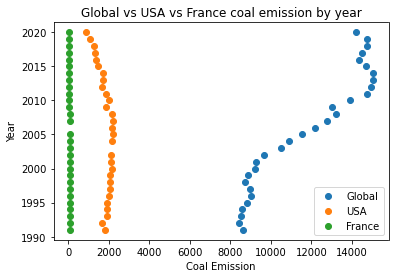

In [425]:
#Global vs USA vs France coal emission by year

plt.scatter( df2_glo['Coal'], df2_glo['Year'])
plt.scatter( df2_usa['Coal'], df2_usa['Year'])
plt.scatter( df2_fra['Coal'], df2_fra['Year'])

plt.xlabel("Coal Emission")
plt.ylabel("Year")

plt.title("Global vs USA vs France coal emission by year")
plt.legend(["Global", "USA", "France"])

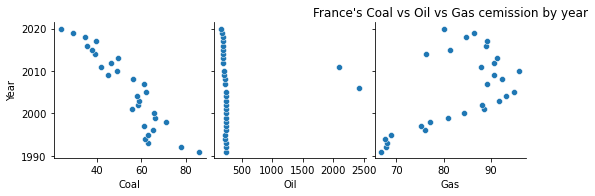

In [426]:
#France's Coal vs Oil vs Gas cemission by year

import seaborn as sns

# Create a pair plot
sns.pairplot(df2_fra, x_vars=['Coal', 'Oil', 'Gas'], y_vars='Year', kind='scatter')
plt.title("France's Coal vs Oil vs Gas cemission by year")
plt.show()

Text(0.5, 1.0, "Italy's temperature over years")

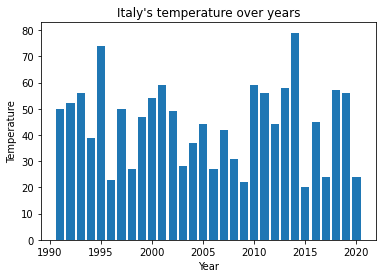

In [427]:
#Italy's temperature per year

plt.bar(df2_ita['Year'], df2_ita['Temperature'])

plt.xlabel("Year")
plt.ylabel("Temperature")

plt.title("Italy's temperature over years")

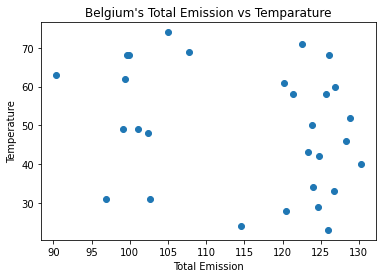

In [428]:
#Belgium's Total Emission vs Temparature

plt.xlabel('Total Emission')
plt.ylabel('Temperature')
plt.title("Belgium's Total Emission vs Temparature")

plt.scatter(df2_belgium['Total'], df2_belgium['Temperature'])

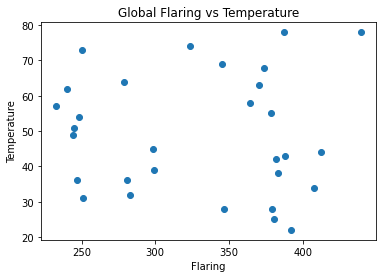

In [32]:
#Global Flaring vs Temperature

plt.xlabel('Flaring')
plt.ylabel('Temperature')
plt.title("Global Flaring vs Temperature")

plt.scatter(df2_glo['Flaring'], df2_glo['Temperature'])

In [429]:
# Spotted uncorrelated or unrelated features, then dropped them

df2.drop(columns = ['Other', 'Flaring', 'GDP Per Capita (USD)', 'Per Capita'], inplace=True) #Kept temperature
df2.corr()

,Year,Total,Temperature,Coal,Oil,Gas,Cement
Year,1.000000,0.052302,-0.009807,0.054405,0.014048,0.063420,0.056612
Total,0.052302,1.000000,-0.015578,0.995452,0.971058,0.980740,0.765564
Temperature,-0.009807,-0.015578,1.000000,-0.016284,-0.013335,-0.025793,-0.025145
Coal,0.054405,0.995452,-0.016284,1.000000,0.959846,0.973783,0.774031
Oil,0.014048,0.971058,-0.013335,0.959846,1.000000,0.983035,0.799117
Gas,0.063420,0.980740,-0.025793,0.973783,0.983035,1.000000,0.796875
Cement,0.056612,0.765564,-0.025145,0.774031,0.799117,0.796875,1.000000


In [430]:
# We should not factorize since in the ques "Categorical" is mentioned
# df2['Country'] = pd.factorize(df2['Country'])[0]
# df2.dtypes

# Datatype to Categorical

df2['Country'] = pd.Categorical(df2['Country'])
df2.dtypes

Country        category
Year            float64
Total           float64
Temperature       int64
Coal            float64
Oil             float64
Gas             float64
Cement          float64
dtype: object

In [431]:
# Normalized

def normalize(column_name):
    minimum = df2[column_name].min()
    maximum = df2[column_name].max()

    normalized_column = (df2[column_name] - minimum) / (maximum - minimum)

    return normalized_column
    
df2['Total'] = normalize('Total')
df2['Temperature'] = normalize('Temperature')
df2['Coal'] = normalize('Coal')
df2['Oil'] = normalize('Oil')
df2['Gas'] = normalize('Gas')
df2['Cement'] = normalize('Cement')

df2

,Country,Year,Total,Temperature,Coal,Oil,Gas,Cement
0,AUSTRALIA,1991.0,0.007482,0.966102,0.009690,0.007009,0.004287,0.001305
1,AUSTRALIA,1992.0,0.007617,0.915254,0.009953,0.006982,0.004442,0.001199
2,AUSTRALIA,1993.0,0.007734,0.016949,0.009956,0.007182,0.004664,0.001232
3,AUSTRALIA,1994.0,0.007864,0.508475,0.010041,0.007307,0.004842,0.001429
4,AUSTRALIA,1995.0,0.008169,0.694915,0.010330,0.007647,0.005208,0.001377
...,...,...,...,...,...,...,...,...
346,GLOBAL,2016.0,0.957973,0.593220,0.954096,0.973929,0.911883,0.609929
347,GLOBAL,2017.0,0.973414,0.033898,0.963821,0.991654,0.934279,0.618255
348,GLOBAL,2018.0,0.993095,0.406780,0.979757,0.993548,0.984612,0.643386
349,GLOBAL,2019.0,1.000000,0.983051,0.978372,1.000000,1.000000,0.663184


In [432]:
'''
#Reference

1)
https://sparkbyexamples.com/pandas/pandas-drop-first-three-rows-of-a-dataframe/#:~:text=By%20using%20DataFrame.,first%20three%20rows%20from%20DataFrame.

2)

https://saturncloud.io/blog/how-to-split-a-large-pandas-dataframe/#:~:text=One%20way%20to%20split%20a,equal%20or%20near%2Dequal%20size.

'''

'\n#Reference\n\n1)\nhttps://sparkbyexamples.com/pandas/pandas-drop-first-three-rows-of-a-dataframe/#:~:text=By%20using%20DataFrame.,first%20three%20rows%20from%20DataFrame.\n\n2)\n\nhttps://saturncloud.io/blog/how-to-split-a-large-pandas-dataframe/#:~:text=One%20way%20to%20split%20a,equal%20or%20near%2Dequal%20size.\n\n'